In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ODEvolution import *
from random import choice

## Basic usage of ODEvolution package

Generate wild type genotype and a mutant genotype with mumax and survival fraction similar to S1 from the paper. The mutant starts with 1 cell (n0=0.1 cfu/ml)

In [106]:
gs = [Genotype(gid='WT'), Genotype(gid='S1',mumax = 0.9, survival = 0.14, n0=0.1)]

Attributes that can be set for each genotype:

In [107]:
gs[0].__dict__

{'gid': 'WT',
 'mumax': 1.11,
 'e': 5e-09,
 'km': 0.25,
 'n': array([[10000]]),
 'mutations': array([], shape=(0, 1), dtype=float64),
 'survival': 0.0004,
 'survivors': array([], shape=(0, 1), dtype=float64),
 'ts': array([], shape=(0, 1), dtype=float64),
 'mr': 2e-10,
 'mutation_times': array([], shape=(0, 1), dtype=float64),
 'extinct': False,
 'emerged': 0,
 'stepdy': array([], shape=(0, 1), dtype=float64),
 'ic50': 1,
 'kappa': 1}

In [108]:
# Initialize experiment with standard parameters:
exp = Experiment(gs)

Attributes that can be set in experiments:

In [109]:
exp.__dict__

{'genotypes': [<ODEvolution.Genotype at 0x1b13168e250>,
 'cycles': 0,
 'volume': 10,
 'sample_volume': 0.1,
 'dilution': 100.0,
 'predilution': 4,
 'gluc_start': 20,
 'gluc': array([20]),
 'antibiotic': 0,
 't_span': [0, 24],
 'ts': array([], shape=(0, 1), dtype=float64),
 'sols': array([], shape=(0, 3), dtype=float64),
 'killing': True,
 'survivors': array([], shape=(0, 2), dtype=float64),
 'fractions': array([], shape=(0, 2), dtype=float64),
 'total': array([], shape=(0, 2), dtype=float64),
 'poisson': True}

Get info about genotypes from exp:

In [97]:
exp.from_genos('mumax')

array([1.11, 0.9 ])

Survival fraction:

In [98]:
exp.from_genos('survival')

array([0.0004, 0.14  ])

Conduct a basic competition experiment with periodic killing, for 15 cycles:

In [99]:
exp.conduct_steps(cycles=15)

Plot the results:

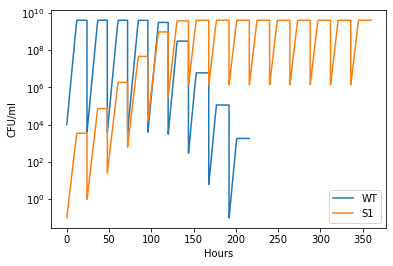

In [100]:
plt.figure()
[plt.plot(g.ts, g.n[:-1], label=g.gid) for g in exp.genotypes]
plt.yscale('log')
plt.xlabel('Hours')
plt.ylabel('CFU/ml')
plt.legend()

Plot only the survivors after each killing:

Text(0, 0.5, 'Survivors')

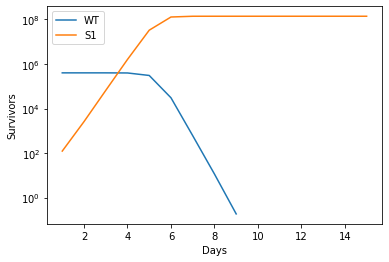

In [101]:
plt.figure()
[plt.plot(range(1,len(g.survivors)+1),g.survivors, label=g.gid) for g in exp.genotypes] 
plt.yscale('log')
plt.xlabel('Days')
plt.legend()
plt.ylabel('Survivors')

Conduct another 15 cycles, this time without killing:

In [102]:
exp.killing=False
exp.conduct_steps(cycles=15)

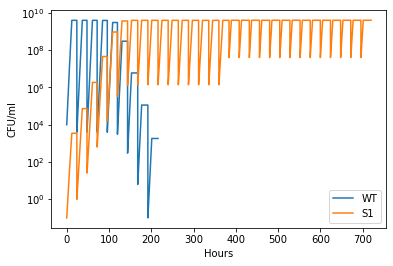

In [103]:
plt.figure()
[plt.plot(g.ts, g.n[:-1], label=g.gid) for g in exp.genotypes]
plt.yscale('log')
plt.xlabel('Hours')
plt.ylabel('CFU/ml')
plt.legend()